<a href="https://colab.research.google.com/github/wallisonferreira/bitcoin-and-markets-analysis/blob/master/pre_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento

Neste arquivo está sendo feita uma sequência de tarefas para limpeza dos dados. Lidamos com uma base de cerca de 3800 registros e 23 features contendo, dentre eles, valores vazios em intervalos distintos.

Para que possamos fazer generalizações com análise de regressão é necessário que sejam excluídos os valores vazios por que eles podem enviesar o nosso modelo atribuindo pesos inconsistentes.

Uma outra técnica que também pode ser utilizada é a de interpolação de dados vazios (geralmente até 3 dados vazios em sequência), quando o intervalo de valores vazios é muito pequeno ou quando o valor vazio está isolado entre os dados.

In [1]:
# conecta ao google drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
# importa os dados de mercado
market = pd.read_csv("/content/drive/My Drive/Análise Exploratória/Dados/market_data.v6.csv")

In [232]:
# transforming date
market['Date'] = pd.to_datetime(market['Date'])

#Excluindo colunas indesejadas

In [233]:
# delete unnamed column
def delete_unnamed_col(data = market):
  cols = market.columns
  if 'Unnamed: 0' in cols:
    data = data.drop('Unnamed: 0', axis=1)
  else:
    data = data
  return data

market = delete_unnamed_col(market)

#Merge de colunas adicionais
Nesta seção faremos o merge de dados de oil_price e sp500 em nosso dataset

In [234]:
# carrega dados adicionais
oil_price = pd.read_csv('/content/drive/My Drive/Análise Exploratória/Dados/oil_price.csv')
sp500 = pd.read_csv('/content/drive/My Drive/Análise Exploratória/Dados/sp500.csv')

In [235]:
# renomeando colunas
oil_price.rename(columns={'Value':'OilPrice'}, inplace=True)
sp500.rename(columns={'Close':'SP500'}, inplace=True)

In [236]:
# selecionando colunas específicas
sp500 = sp500[['Date', 'SP500']]
oil_price = oil_price[['Date', 'OilPrice']]

In [237]:
# transformando coluna dates
sp500['Date'] = pd.to_datetime(sp500['Date'])
oil_price['Date'] = pd.to_datetime(oil_price['Date'])

In [238]:
# criando index temporários para realizar o merge
market['Date_Index'] = market['Date'].astype(str)
sp500['Date_Index_S'] = sp500['Date'].astype(str)
oil_price['Date_Index_O'] = oil_price['Date'].astype(str)

Juntando coluna OilPrice e SP500, respectivamente

***TODO: merge não funciona para todas as instâncias. Há valores vazios gerados durante a junção.***

In [249]:
# merge de coluna sp500
market.merge(sp500, how='right', left_on='Date_Index', right_on='Date_Index_S')
market = result

In [181]:
# merge de colunas oil price
result = pd.merge(market, oil_price, on='Date', how='left')
# excluindo coluna antiga e renomeando a nova
result.drop('OilPrice_x', axis=1, inplace=True)
result.rename(columns={'OilPrice_y':'OilPrice'}, inplace=True)
market = result

In [253]:
market[['Date','SP500','Date_Index']].head(10)

,Date,SP500,Date_Index
0,2009-03-01,NaN,2009-03-01
1,2009-04-01,811.08,2009-04-01
2,2009-05-01,877.52,2009-05-01
3,2009-06-01,942.87,2009-06-01
4,2009-07-01,923.33,2009-07-01
5,2009-08-01,NaN,2009-08-01
6,2009-09-01,998.04,2009-09-01
7,2009-10-01,1029.85,2009-10-01
8,2009-11-01,NaN,2009-11-01
9,2009-12-01,1108.86,2009-12-01


In [255]:
sp500

,Date,SP500,Date_Index_S
0,2009-01-05,927.45,2009-01-05
1,2009-01-06,934.70,2009-01-06
2,2009-01-07,906.65,2009-01-07
3,2009-01-08,909.73,2009-01-08
4,2009-01-09,890.35,2009-01-09
...,...,...,...
2613,2019-05-23,2822.24,2019-05-23
2614,2019-05-24,2826.06,2019-05-24
2615,2019-05-28,2802.39,2019-05-28
2616,2019-05-29,2783.02,2019-05-29


#Visualizando informações das features

In [252]:
# visualizando tipos de cada coluna
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 3799
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3800 non-null   datetime64[ns]
 1   GoogleTrends               3800 non-null   float64       
 2   Bitcoin_DD                 2746 non-null   float64       
 3   MarketPrice                3800 non-null   float64       
 4   TradeVolume                3789 non-null   float64       
 5   NewPosts                   3267 non-null   float64       
 6   NewMembers                 3267 non-null   float64       
 7   PageViews                  3267 non-null   float64       
 8   Difficulty                 3800 non-null   float64       
 9   CostPerTransaction         3800 non-null   float64       
 10  CostPerTransactionPercent  3798 non-null   float64       
 11  EstimTransactionVolume     3800 non-null   float64       
 12  MedCon

In [ ]:
# informa valores vazios não incluindo zeros
def empty_values(data):
  columns = data.columns

  return pd.DataFrame({ \
                      'Columns':[col for col in columns if col != 'Date'], \
                      'Empty':[data[col].isnull().sum() for col in columns if col != 'Date'], \
                      'Empty(%)':[data[col].isnull().sum()/data[col].isnull().count() for col in columns if col != 'Date']})

empty_values1 = empty_values(data = market)
empty_values1.sort_values('Empty', ascending=False)

,Columns,Empty,Empty(%)
1,Bitcoin_DD,1054,0.277368
4,NewPosts,533,0.140263
5,NewMembers,533,0.140263
6,PageViews,533,0.140263
15,TotalBitcoins,486,0.127895
3,TradeVolume,11,0.002895
9,CostPerTransactionPercent,2,0.000526
19,EURUSD,1,0.000263
0,GoogleTrends,0,0.000000
14,OutputVolume,0,0.000000


# Transformação

In [ ]:
# substitui todos os zeros por NaN
df_market2 = market

df_market2.replace(0.0, np.nan, inplace=True)

In [ ]:
# informa valores vazios incluindo os zeros substituidos por nan
empty_values2 = empty_values(data=df_market2)
empty_values2.sort_values('Empty', ascending=False)

,Columns,Empty,Empty(%)
6,PageViews,1570,0.413158
1,Bitcoin_DD,1316,0.346316
11,MedConfirmationTime,1063,0.279737
5,NewMembers,969,0.255000
4,NewPosts,894,0.235263
17,TransactionFeesUSD,676,0.177895
16,TransactionFees,631,0.166053
2,MarketPrice,591,0.155526
8,CostPerTransaction,591,0.155526
3,TradeVolume,571,0.150263


In [ ]:
# calcula o número de dados vazios em cada linha
count_nulls = market2.isnull().sum(axis=1)

In [ ]:
# localiza os valores vazios
columns = market2.columns
count_nulls_market = pd.DataFrame()

for row in columns:
  if (row != 'Date'):
    count_nulls_market[row] = market1[row].isnull().values.astype(int)

count_nulls_market.head()

,GoogleTrends,Bitcoin_DD,MarketPrice,TradeVolume,NewPosts,NewMembers,PageViews,Difficulty,CostPerTransaction,CostPerTransactionPercent,EstimTransactionVolume,MedConfirmationTime,NumOfAddresses,NumOfTransactions,OutputVolume,TotalBitcoins,TransactionFees,TransactionFeesUSD,DowJones,EURUSD,USDEUR,OilPrice
0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0


# Exclusão

Buscamos o índice do primeiro valor não vazio de Market Price para que possamos podar a nossa tabela, retirando valores vazios anteriores.

In [ ]:
# encontra o primeiro índice com valor não vazio
df_market2['MarketPrice'].first_valid_index()

591

O índice 591 é o primeiro valor não vazio de Market Price. Por conveniência, podemos excluir os dados anteriores para que tenhamos um novo conjunto de dados que possa ser útil para o nosso modelo.

In [ ]:
df_market2['MarketPrice'][590:600]

590     NaN
591    0.08
592    0.07
593    0.07
594    0.07
595    0.07
596    0.07
597    0.07
598    0.07
599    0.07
Name: MarketPrice, dtype: float64

In [ ]:
# exclui valores vazios de market price
df_market2.drop(range(0,591), axis=0, inplace=True)
df_market2.head()

,Date,GoogleTrends,Bitcoin_DD,MarketPrice,TradeVolume,NewPosts,NewMembers,PageViews,Difficulty,CostPerTransaction,CostPerTransactionPercent,EstimTransactionVolume,MedConfirmationTime,NumOfAddresses,NumOfTransactions,OutputVolume,TotalBitcoins,TransactionFees,TransactionFeesUSD,DowJones,EURUSD,USDEUR,OilPrice
590,2010-08-16,25.0,134739.0,NaN,643.89,253.0,23.0,NaN,511.77,NaN,31.63,18336.0,NaN,387.0,318.0,41918.88,3737700.0,NaN,NaN,10302.01,1.28,0.78,72.27
592,2010-08-18,12.0,394865.0,0.07,206.78,179.0,13.0,NaN,511.77,1.31,18.58,35791.0,NaN,449.0,377.0,52829.65,3750900.0,1.56,0.12,10415.54,1.29,0.78,73.05
593,2010-08-19,13.0,236163.0,0.07,51.88,152.0,18.0,NaN,511.77,1.31,50.89,13756.0,NaN,395.0,368.0,32027.42,3757900.0,NaN,NaN,10271.21,1.28,0.78,73.03
594,2010-08-20,13.0,125762.0,0.07,293.98,200.0,20.0,NaN,511.77,1.40,39.49,21143.0,NaN,433.0,398.0,36647.52,3766250.0,NaN,NaN,10213.62,1.27,0.79,71.78
595,2010-08-21,NaN,153983.0,0.07,731.07,100.0,22.0,NaN,511.77,1.77,52.71,17456.0,NaN,396.0,348.0,33790.41,3775450.0,NaN,NaN,10213.62,1.27,0.79,71.78


Com a exclusão dos valores vazios de market price, temos um novo conjunto. Vejamos:

In [ ]:
# soma de vazios e valores de cada coluna
df_market2.isnull().sum(), df_market2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 590 to 3799
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3209 non-null   object 
 1   GoogleTrends               3181 non-null   float64
 2   Bitcoin_DD                 2154 non-null   float64
 3   MarketPrice                3208 non-null   float64
 4   TradeVolume                3198 non-null   float64
 5   NewPosts                   2671 non-null   float64
 6   NewMembers                 2655 non-null   float64
 7   PageViews                  2230 non-null   float64
 8   Difficulty                 3209 non-null   float64
 9   CostPerTransaction         3208 non-null   float64
 10  CostPerTransactionPercent  3209 non-null   float64
 11  EstimTransactionVolume     3209 non-null   float64
 12  MedConfirmationTime        2737 non-null   float64
 13  NumOfAddresses             3209 non-null   flo

(Date                            0
 GoogleTrends                   28
 Bitcoin_DD                   1055
 MarketPrice                     1
 TradeVolume                    11
 NewPosts                      538
 NewMembers                    554
 PageViews                     979
 Difficulty                      0
 CostPerTransaction              1
 CostPerTransactionPercent       0
 EstimTransactionVolume          0
 MedConfirmationTime           472
 NumOfAddresses                  0
 NumOfTransactions               0
 OutputVolume                    0
 TotalBitcoins                 486
 TransactionFees                73
 TransactionFeesUSD             86
 DowJones                        0
 EURUSD                        117
 USDEUR                          0
 OilPrice                        0
 dtype: int64, None)

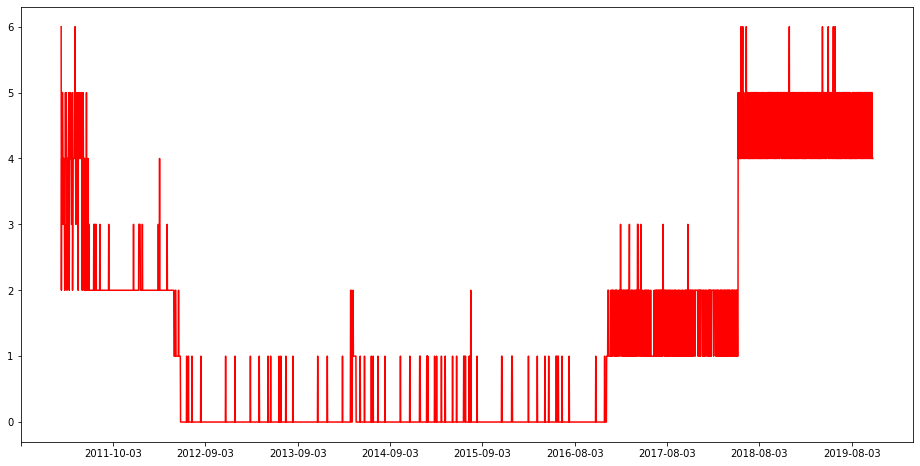

In [ ]:
# soma de valores nulos por dia
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(market2['Date'], count_nulls,'-r')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 365))
fig.show();

Pode-se ver, acima, que há um intervalo muito grande de dados vazios que corresponde a mais 50% da base. Os dados vazios aparecem inclusive concentrados em datas onde o movimento da variável explicada é muito grande (Lado direito).

Alternativas para lidar com esse problema:

* Selecionar somente o intervalo, concentrados no meio do gráfico, e realizar a exclusão dos dados extremos;
* Selecionar apenas as features com menos valores vazios;
* Selecionar do intervalo do meio para a direita, excluindo features com grandes intervalos de vazios;

In [ ]:
# soma de valores nulos por dia
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(market1['Date'], count_nulls_market['MarketPrice'],'-r')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 365))
fig.show();

In [ ]:
# soma de valores nulos por dia
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(market1['Date'], count_nulls_market['GoogleTrends'],'-r')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 365))
fig.show();